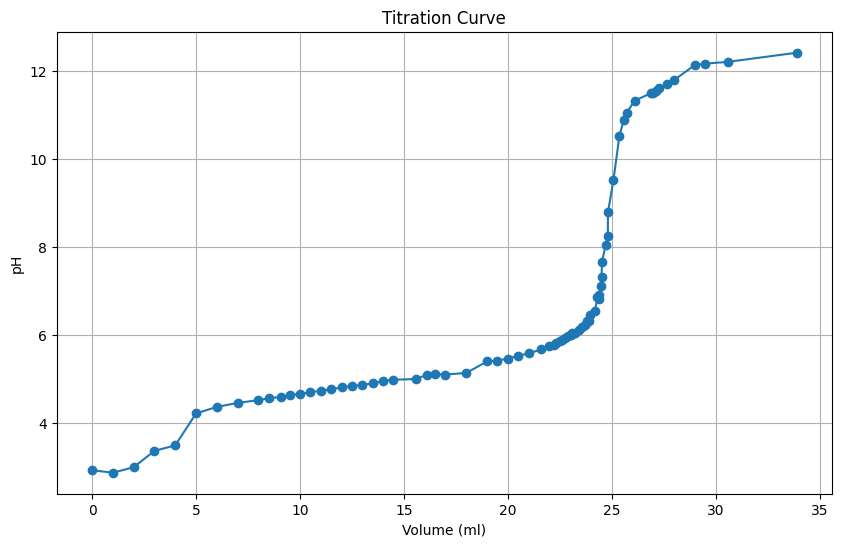

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('edited.csv')

# Sort the dataframe by 'Data Set 1:volume(ml)'
df_sorted = df.sort_values(by='Data Set 1:volume(ml)')

# Plot pH vs. volume
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Data Set 1:volume(ml)'], df_sorted['Data Set 1:pH'], marker='o', linestyle='-')
plt.title('Titration Curve')
plt.xlabel('Volume (ml)')
plt.ylabel('pH')
plt.grid(True)
plt.show()


In [2]:
df_sorted

,Unnamed: 0,Data Set 1:pH,Data Set 1:volume(ml)
0,0,2.918668,0.000000
1,1,2.861700,1.000000
2,2,2.987518,2.000000
3,3,3.359398,3.000000
4,4,3.484064,4.000000
...,...,...,...
69,69,11.797036,27.987654
70,70,12.137766,28.987654
71,71,12.174158,29.487510
72,72,12.214753,30.590000


In [3]:
df_save = pd.DataFrame()
df_save['Data Set 1:pH'] = df_sorted['Data Set 1:pH']
df_save['Data Set 1:volume(ml)'] = df_sorted['Data Set 1:volume(ml)']

In [4]:
df_save.to_csv('edited.csv')

In [5]:
df2 = df_save
df2

,Data Set 1:pH,Data Set 1:volume(ml)
0,2.918668,0.000000
1,2.861700,1.000000
2,2.987518,2.000000
3,3.359398,3.000000
4,3.484064,4.000000
...,...,...
69,11.797036,27.987654
70,12.137766,28.987654
71,12.174158,29.487510
72,12.214753,30.590000


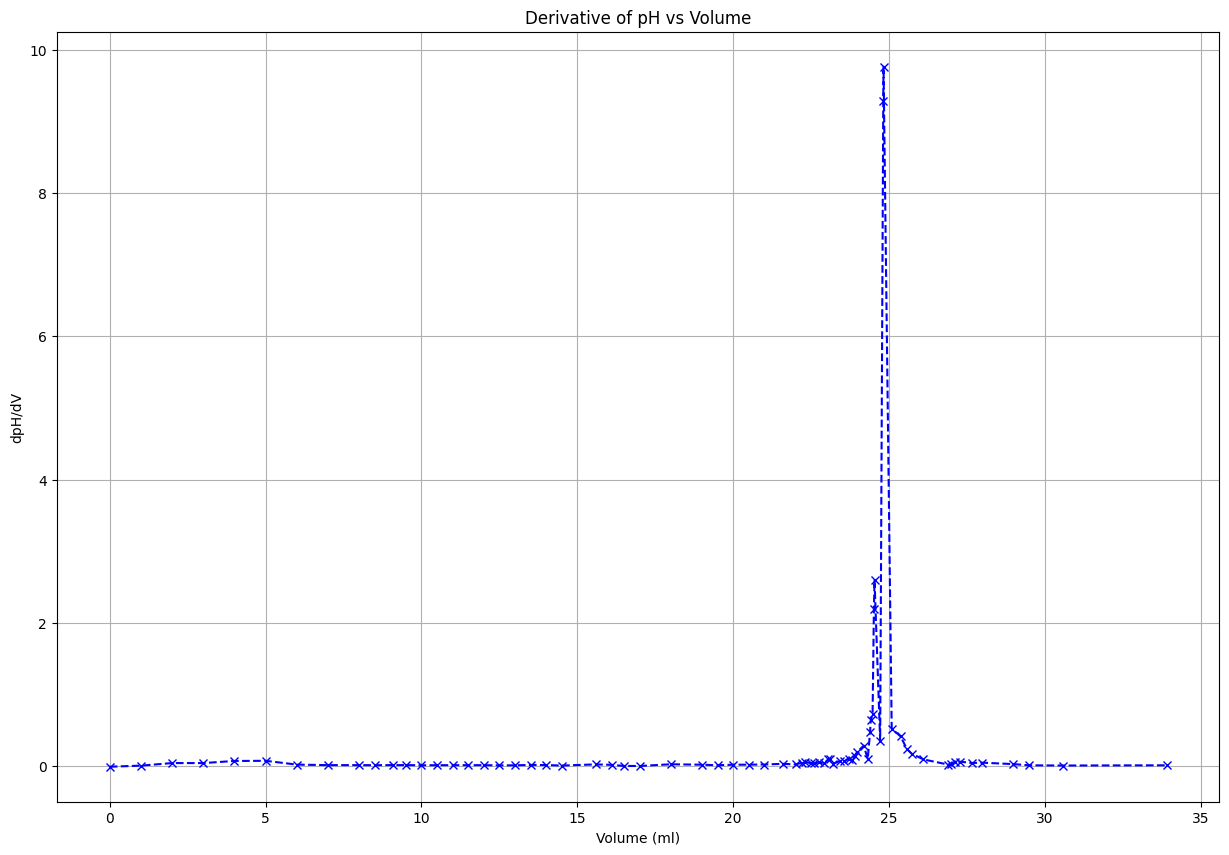

In [6]:
import numpy as np
# Calculating the derivative of pH with respect to volume (ΔpH/ΔV)
df2['dpH/dV'] = np.gradient(df2['Data Set 1:pH'], df2['Data Set 1:volume(ml)'])
df2['dpH/dV'] = df2['dpH/dV']/6
# Plotting the derivative vs volume
plt.figure(figsize=(15, 10))
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV'], marker='x', linestyle='--', color='b')
plt.title('Derivative of pH vs Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('dpH/dV')
plt.grid(True)
plt.show()

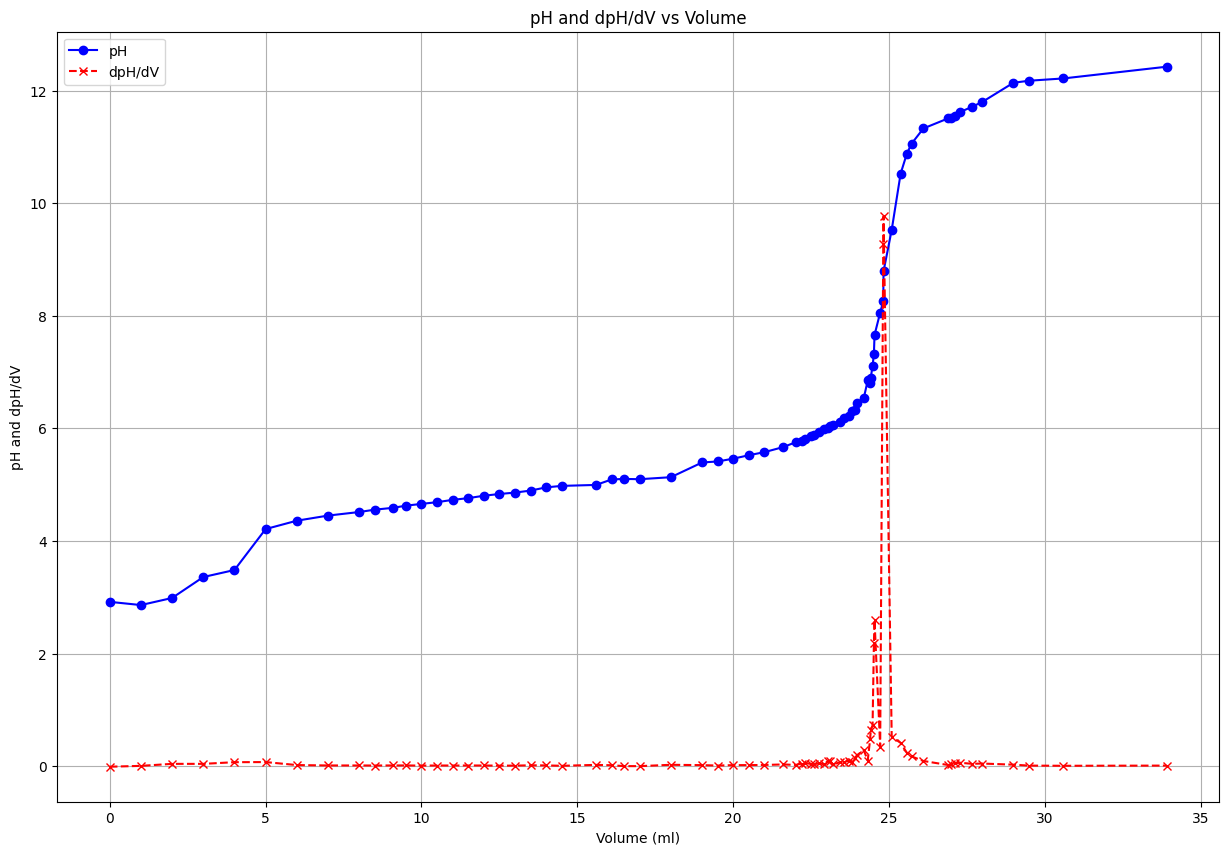

In [7]:
# Plotting both pH and derivative on the same graph
plt.figure(figsize=(15, 10))

# Plot pH
plt.plot(df2['Data Set 1:volume(ml)'], df2['Data Set 1:pH'], label='pH', marker='o', linestyle='-', color='b')

# Plot dpH/dV
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV'], label='dpH/dV', marker='x', linestyle='--', color='r')

# Adding labels and title
plt.title('pH and dpH/dV vs Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('pH and dpH/dV')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The pH value at the point where the derivative is maximized (Volume = 24.821234567891 ml) is 8.79.


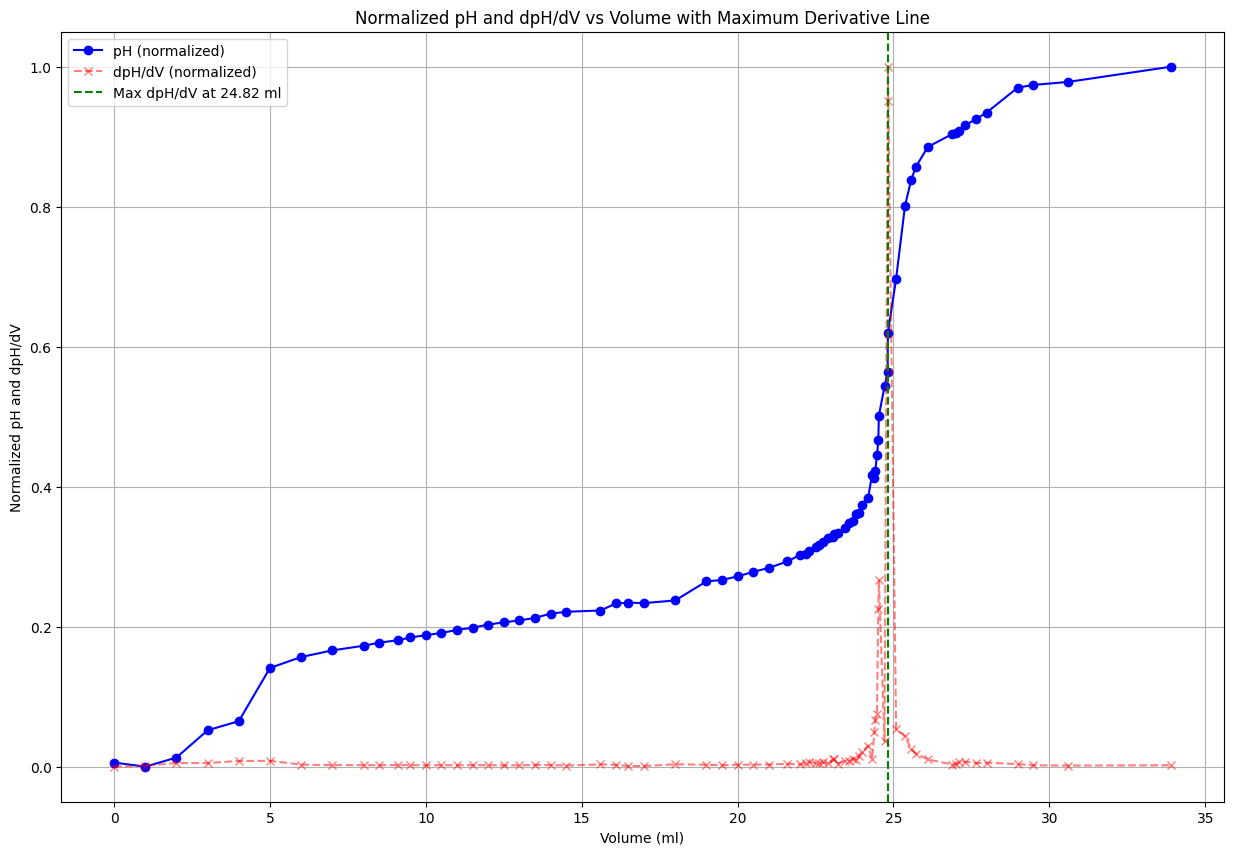

The pH value at the point where the derivative is maximized (Volume = 24.821234567891 ml) is 8.79.


In [8]:
# Normalize both pH and dpH/dV to the same scale [0, 1] for plotting on the same axis
df2['pH_normalized'] = (df2['Data Set 1:pH'] - df2['Data Set 1:pH'].min()) / (df2['Data Set 1:pH'].max() - df2['Data Set 1:pH'].min())
df2['dpH/dV_normalized'] = (df2['dpH/dV'] - df2['dpH/dV'].min()) / (df2['dpH/dV'].max() - df2['dpH/dV'].min())

# Find the index where dpH/dV is maximized
max_derivative_index = df2['dpH/dV'].idxmax()
max_volume = df2['Data Set 1:volume(ml)'].iloc[max_derivative_index]
max_pH = df2['Data Set 1:pH'].iloc[max_derivative_index]

# Print the pH at the point of maximum derivative
print(f'The pH value at the point where the derivative is maximized (Volume = {max_volume} ml) is {max_pH:.2f}.')

# Plotting both normalized pH and normalized derivative on the same graph
plt.figure(figsize=(15, 10))

# Plot normalized pH
plt.plot(df2['Data Set 1:volume(ml)'], df2['pH_normalized'], label='pH (normalized)', marker='o', linestyle='-', color='b')

# Plot normalized dpH/dV with reduced opacity
plt.plot(df2['Data Set 1:volume(ml)'], df2['dpH/dV_normalized'], label='dpH/dV (normalized)', marker='x', linestyle='--', color='r', alpha=0.5)

# Plot vertical line where derivative is maximized
plt.axvline(x=max_volume, color='g', linestyle='--', label=f'Max dpH/dV at {max_volume:.2f} ml')

# Adding labels and title
plt.title('Normalized pH and dpH/dV vs Volume with Maximum Derivative Line')
plt.xlabel('Volume (ml)')
plt.ylabel('Normalized pH and dpH/dV')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the pH at the point of maximum derivative
print(f'The pH value at the point where the derivative is maximized (Volume = {max_volume} ml) is {max_pH:.2f}.')
df_save.to_csv('edited.csv')
